In [55]:
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
from sklearn.tree import _tree
from sklearn.metrics import accuracy_score

# --- Wczytanie danych ---
df = pd.read_csv("nowy.csv", sep=',')
df['Potability'] = df['Potability'].astype(int)

# --- Podział na cechy i etykiety ---
X = df.drop('Potability', axis=1)
Y = df['Potability']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Wygeneruj drzewo decyzyjne, a następnie przeprowadź indukcję reguł decyzyjnych z drzewa.
Skorzystaj z udostępnionego kodu w Pythonie lub własnej implementacji.
Opisz szczegółowo, jakie parametry zostały użyte do wygenerowania drzewa decyzyjnego:
* Algorytm budowy drzewa (np. ID3, C4.5, CART)
* Maksymalna głębokość drzewa (jeśli ograniczono)
* Minimalna liczba próbek w liściu
* Inne parametry wpływające na strukturę drzewa (np. miara jakości podziału: entropia, Gini)
Uzasadnij, dlaczego wybrane parametry zostały użyte.

Dokładność modelu: 0.6111111111111112


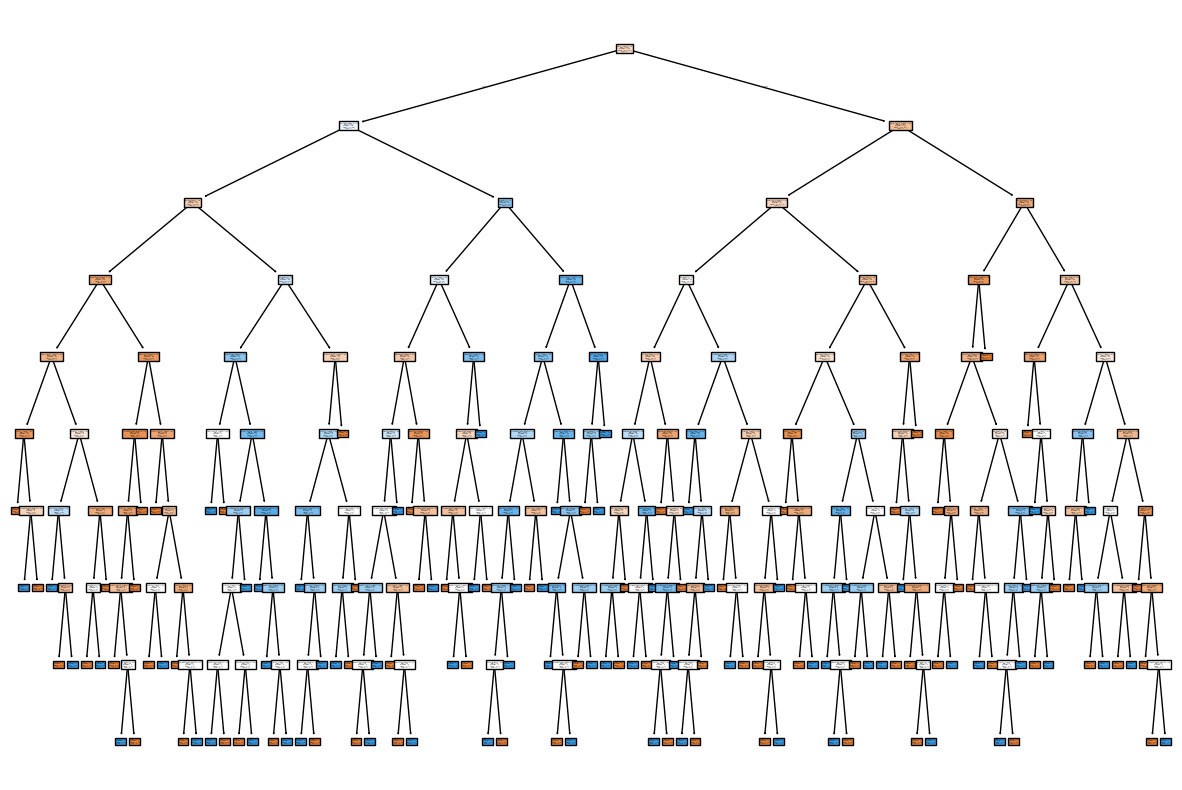

In [56]:
# Utworzenie i dopasowanie modelu CART
model = DecisionTreeClassifier(
    random_state=42)
model.fit(x_train, y_train)

# Predykcja i ocena
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu:", accuracy)

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns,class_names=[str(c) for c in model.classes_],filled=True)
plt.show()

In [57]:
# Wyodrębnienie reguł decyzyjnych
def extract_rules(tree: DecisionTreeClassifier, feature_names: list, target_names: list) -> list:

    from sklearn.tree import _tree

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined"
        for i in tree_.feature
    ]
    rules = []

    def recurse(node, depth, rule, samples):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:  # If not a leaf node
            name = feature_name[node]
            # Reguła dla lewej i prawej gałęzi
            recurse(tree_.children_left[node], depth + 1, rule + [f"{name}=0"], samples * tree_.n_node_samples[tree_.children_left[node]] / tree_.n_node_samples[node])
            recurse(tree_.children_right[node], depth + 1, rule + [f"{name}=1"], samples * tree_.n_node_samples[tree_.children_right[node]] / tree_.n_node_samples[node])
        else:
            # Węzeł końcowy - klasyfikacja
            value = tree_.value[node]*samples
            outcome = []

            # Iterate over the class probabilities and append class-sample pairs to the outcome list
            for i, class_prob in enumerate(value[0]):
                if class_prob > 0:
                    outcome.append((target_names[i], class_prob))

            rules.append((rule, outcome, samples))

    recurse(0, 1, [], tree_.n_node_samples[0])
    return rules

# Wyodrębnienie i wyświetlenie reguł
rules = extract_rules(model, X.columns, [0,1])

#rules = extract_rules(model, X_encoded.columns, [0,1,2])#iris.target_names)
for rule, outcome, samples in rules:
    dec=f"{','.join([f"{x[0]}[{x[1]:.0f}]" for x in outcome])}"
    print(f"({')&('.join(rule)})=>(dec={{{dec}}}) {samples:.0f}")


(Solids_range1=0)&(Hardness_range1=0)&(Sulfate_range1=0)&(Chloramines_range2=0)&(Organic_carbon_range2=0)&(Turbidity_range2=0)=>(dec={0[7]}) 7
(Solids_range1=0)&(Hardness_range1=0)&(Sulfate_range1=0)&(Chloramines_range2=0)&(Organic_carbon_range2=0)&(Turbidity_range2=1)&(Trihalomethanes_range1=0)=>(dec={1[2]}) 2
(Solids_range1=0)&(Hardness_range1=0)&(Sulfate_range1=0)&(Chloramines_range2=0)&(Organic_carbon_range2=0)&(Turbidity_range2=1)&(Trihalomethanes_range1=1)=>(dec={0[3]}) 3
(Solids_range1=0)&(Hardness_range1=0)&(Sulfate_range1=0)&(Chloramines_range2=0)&(Organic_carbon_range2=1)&(Turbidity_range2=0)&(Conductivity_range1=0)=>(dec={1[2]}) 2
(Solids_range1=0)&(Hardness_range1=0)&(Sulfate_range1=0)&(Chloramines_range2=0)&(Organic_carbon_range2=1)&(Turbidity_range2=0)&(Conductivity_range1=1)&(ph_range1=0)=>(dec={0[2]}) 2
(Solids_range1=0)&(Hardness_range1=0)&(Sulfate_range1=0)&(Chloramines_range2=0)&(Organic_carbon_range2=1)&(Turbidity_range2=0)&(Conductivity_range1=1)&(ph_range1=1)=>(de

In [58]:
# Analiza reguł
num_rules = len(rules)

# Liczba warunków w każdej regule
rule_lengths = [len(rule) for rule, outcome, samples in rules]

avg_conditions = sum(rule_lengths) / num_rules if num_rules > 0 else 0

# Najkrótsza i najdłuższa reguła
min_len = min(rule_lengths)
max_len = max(rule_lengths)

shortest_rules = [rule for rule, outcome, samples in rules if len(rule) == min_len]
longest_rules = [rule for rule, outcome, samples in rules if len(rule) == max_len]

print("Liczba reguł:", num_rules)
print("Średnia liczba warunków w regule:", avg_conditions)
print("Najkrótsza reguła (liczba warunków =", min_len, "):")
for r in shortest_rules:
    print("  ", r)

print("Najdłuższa reguła (liczba warunków =", max_len, "):")
for r in longest_rules:
    print("  ", r)


Liczba reguł: 139
Średnia liczba warunków w regule: 7.625899280575539
Najkrótsza reguła (liczba warunków = 4 ):
   ['Solids_range1=1', 'Organic_carbon_range2=1', 'Sulfate_range1=0', 'Chloramines_range2=1']
Najdłuższa reguła (liczba warunków = 9 ):
   ['Solids_range1=0', 'Hardness_range1=0', 'Sulfate_range1=0', 'Chloramines_range2=1', 'Conductivity_range2=0', 'Trihalomethanes_range1=0', 'Turbidity_range2=0', 'Organic_carbon_range2=1', 'ph_range2=0']
   ['Solids_range1=0', 'Hardness_range1=0', 'Sulfate_range1=0', 'Chloramines_range2=1', 'Conductivity_range2=0', 'Trihalomethanes_range1=0', 'Turbidity_range2=0', 'Organic_carbon_range2=1', 'ph_range2=1']
   ['Solids_range1=0', 'Hardness_range1=0', 'Sulfate_range1=0', 'Chloramines_range2=1', 'Conductivity_range2=1', 'Organic_carbon_range1=1', 'ph_range2=1', 'Turbidity_range2=1', 'Trihalomethanes_range1=0']
   ['Solids_range1=0', 'Hardness_range1=0', 'Sulfate_range1=0', 'Chloramines_range2=1', 'Conductivity_range2=1', 'Organic_carbon_range1=1

In [59]:
import pandas as pd
import os
import re

def csv_to_rses_tab(filepath):
    # Wczytaj CSV
    df = pd.read_csv(filepath)

    # Zamień spacje w nazwach kolumn
    df.columns = df.columns.str.replace(' ', '_')

    # Ścieżka do pliku .tab
    base = os.path.splitext(filepath)[0]
    tab_filepath = base + '.tab'

    with open(tab_filepath, "w", encoding="utf-8") as f:
        # TABLE
        f.write(f"TABLE {os.path.basename(base)}\n")

        # ATTRIBUTES - wszystkie kolumny symbolic dla True/False
        f.write(f"ATTRIBUTES {len(df.columns)}\n")

        for col in df.columns:
            # Wszystkie kolumny z True/False są symbolic
            f.write(f"{col} symbolic\n")

        # OBJECTS
        f.write(f"OBJECTS {len(df)}\n")

        # Zastąp brakujące wartości i przekonwertuj True/False na 1/0
        df_filled = df.fillna("MISSING")

        for _, row in df_filled.iterrows():
            # Konwertuj wartości wiersza: True->1, False->0, MISSING->MISSING
            values = []
            for val in row:
                if pd.isna(val):
                    values.append("MISSING")
                elif val == True:
                    values.append("1")
                elif val == False:
                    values.append("0")
                else:
                    values.append(str(val))

            line = " ".join(values)
            f.write(line + "\n")

    print(f"Plik {tab_filepath} został utworzony pomyślnie.")


In [60]:
train=x_train.copy()
train['Potability']=y_train

test=x_test.copy()
test['Potability']=y_test

train.to_csv('nowyTrain.csv', index=False)
csv_to_rses_tab('nowyTrain.csv')

test.to_csv('nowyTest.csv', index=False)
csv_to_rses_tab('nowyTest.csv')

csv_to_rses_tab('nowy.csv')

Plik nowyTrain.tab został utworzony pomyślnie.
Plik nowyTest.tab został utworzony pomyślnie.
Plik nowy.tab został utworzony pomyślnie.


In [61]:
attributes = [
    ("ph_range1", "numeric 0"),
    ("ph_range2", "numeric 0"),
    ("Hardness_range1", "numeric 0"),
    ("Hardness_range2", "numeric 0"),
    ("Solids_range1", "numeric 0"),
    ("Solids_range2", "numeric 0"),
    ("Chloramines_range1", "numeric 0"),
    ("Chloramines_range2", "numeric 0"),
    ("Sulfate_range1", "numeric 0"),
    ("Sulfate_range2", "numeric 0"),
    ("Conductivity_range1", "numeric 0"),
    ("Conductivity_range2", "numeric 0"),
    ("Organic_carbon_range1", "numeric 0"),
    ("Organic_carbon_range2", "numeric 0"),
    ("Trihalomethanes_range1", "numeric 0"),
    ("Trihalomethanes_range2", "numeric 0"),
    ("Turbidity_range1", "numeric 0"),
    ("Turbidity_range2", "numeric 0"),
    ("Potability", "symbolic"),
]

with open("rules_test.rul", "w", encoding="utf-8") as f:
    # nagłówek
    print("RULE_SET rules_from_tree", file=f)
    print(f"ATTRIBUTES {len(attributes)}", file=f)
    for name, typ in attributes:
        print(f" {name} {typ}", file=f)

    print("DECISION_VALUES 2", file=f)
    print("0", file=f)
    print("1", file=f)

    print(f"RULES {len(rules)}", file=f)

    # reguły
    for rule, outcome, samples in rules:
        cond = ")&(".join(rule)
        dec = ",".join(f"{c}[{n:.0f}]" for c, n in outcome)
        line = f"({cond})=>(Potability={{{dec}}}) {samples:.0f}"
        print(line, file=f)
